In [1]:
from chebpy2 import Chebfun2, Quasimatrix
import matplotlib.pyplot as plt
import chebpy as cp
import numpy as np

In [2]:
def green(x,s):
    g = 0
    g = (x <= s) * (x * (1-s)) + (x > s) * (s * (1-x))
    return g

In [3]:
prefx = cp.core.settings.ChebPreferences()
prefy = cp.core.settings.ChebPreferences()
prefx.eps = 1e-6
prefy.eps = 1e-6

In [4]:
%%time
g = Chebfun2(green, domain = [0, 1, 0, 1], prefx = prefx, prefy = prefy)

CPU times: user 8.68 s, sys: 3.06 s, total: 11.7 s
Wall time: 11.7 s


In [6]:
xx = np.linspace(0,1,2000)
yy = np.linspace(0,1,2000)

In [7]:
x, y = np.meshgrid(xx,yy)

In [8]:
%%time
out = g[x,y]

CPU times: user 7.23 s, sys: 2.12 s, total: 9.35 s
Wall time: 6.59 s


In [9]:
import matplotlib.pyplot as plt

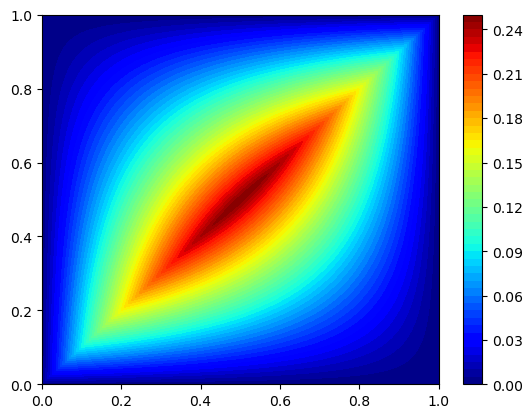

In [10]:
plt.contourf(x,y,out, 50, cmap = 'jet', vmin = np.min(out), vmax = np.max(out))
plt.colorbar()